# Joint Probability, Conditional Probability and Bayes' Rule

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline
sns.set()

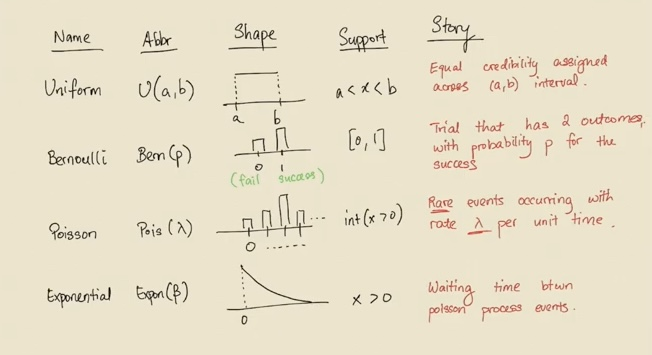

In [4]:
Image(filename="./imgs/distributions.jpg",width=900, height=900)

## Joint Probability & Conditional Probability:


### Joint Probability:

$P(A,B)$ is the probability two events $A$ and $B$ _both_ occurring.
* For example, getting two heads in a row.

If $A$ and $B$ are independent, then $P(A,B)=P(A)P(B)$ but be warned: this is not always (or often) the case.

One way to think of this is considering "AND" as multiplication: the probability of A **and** B is the probability of A **multiplied** by the probability of B.

Let's verify that $P(A,B)=P(A)P(B)$ in the two fair coin-flip case (A=heads, B=heads) by:
- first simulating two coins being flipped together and calculating the proportion of occurences with two heads.
- then simulating one coin flip and calculating the proportion of heads and then doing that again and multiplying the two proportions.

Your two calculations should give "pretty close" results and not the same results due to the (in)accuracy of simulation. 

In [6]:
#1
x_0 = np.random.binomial(2,0.5,10000)
p_ab = sum(x_0==2)/len(x_0)
p_ab

0.2563

(array([2492.,    0.,    0.,    0.,    0., 4945.,    0.,    0.,    0.,
        2563.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

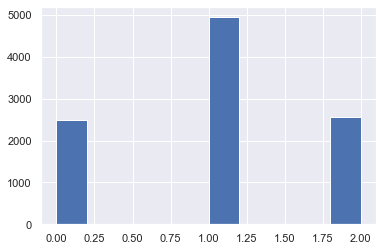

In [8]:
plt.hist(x_0,density=False,bins=10)

In [12]:
#2
x_1 = np.random.binomial(1,0.5,10000)
x_2 = np.random.binomial(1,0.5,10000)
p_a = sum(x_1==1)/len(x_1)
p_b = sum(x_2==1)/len(x_2)
print("P(a)= {}".format(p_a))
print("P(b)= {}".format(p_b))
print("P(a)*P(b)= {}".format(p_a*p_b))

P(a)= 0.5005
P(b)= 0.4897
P(a)*P(b)= 0.24509484999999998


### Joint probabilities for finches:

In [13]:
df1 = pd.read_csv('data/finch_beaks_2012.csv')
lengths = df1['blength']

# Calculate P(A)P(B) of two birds having beak lengths > 10
p_a = (sum(lengths > 10))/len(lengths)
p_b = (sum(lengths > 10))/len(lengths)
p_a*p_b

0.724891534007516

Now calculate $P(A,B)$:

In [14]:
n_samples = 100000
samples = np.random.choice(lengths, (n_samples,2), replace=True)
_ = samples > (10, 10)
p_ab = sum(np.prod(_, axis=1))/n_samples
p_ab

0.72543

### Conditional Probability

Now that we have a grasp on joint probabilities, lets consider conditional probabilities, that is, the probability of some $A$, knowing that some other $B$ is true. We use the notation $P(A|B)$ to denote this. For example, you can ask the question "What is the probability of a finch beak having depth $>10$, knowing that the finch is of species 'fortis'?"

In [16]:
sum(df1.blength > 10)/len(df1)

0.8514056224899599

In [20]:
df_fortis = df1.loc[df1.species == 'fortis']
sum(df_fortis.blength > 10)/len(df_fortis)

0.6942148760330579

Conditional and joint probabilites are related by the following:
$$ P(A,B) = P(A|B)P(B)$$

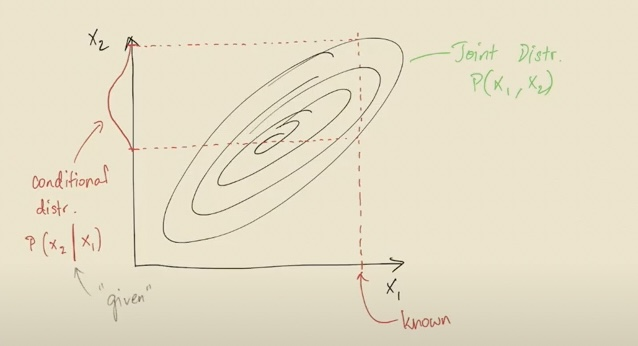

In [21]:
Image(filename="./imgs/conditional.jpg",width=900, height=900)

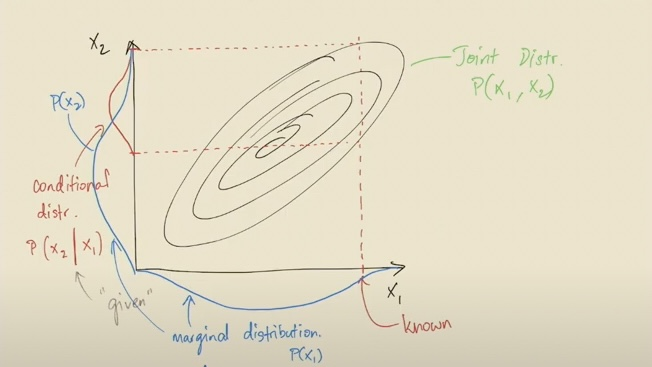

In [22]:
Image(filename="./imgs/marginal.jpg",width=900, height=900)

## Bayes' Theorem (rule):
$$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$$

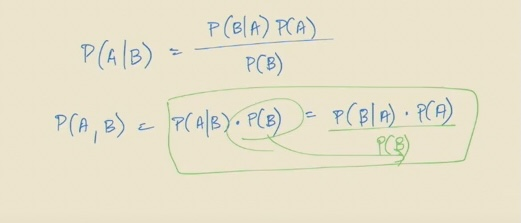

In [23]:
Image(filename="./imgs/bayes.jpg",width=900, height=900)

Bayes' Theorem that will allow us to move back and forth between $P(data|model)$ and $P(model|data)$. As we have seen, $P(model|data)$ is usually what we're interested in as data scientists yet $P(data|model)$ is what we can easily compute, either by simulating our model or using analytic equations.

### drug testing:


**Question:** Suppose that a test for using a particular drug is 99% sensitive and 99% specific. That is, the test will produce 99% true positive results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% (5 in 1,000) of people are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

**If we can answer this, it will be really cool as it shows how we can move from knowing $P(+|user)$ to $P(user|+)$, a MVP for being able to move from $P(data|model)$ to $P(model|data)$.**

In [27]:
n= 100000
users = np.random.binomial(n,0.005,1)
non_users = n - users

In [28]:
# How many of the users are +ve?
user_pos = np.random.binomial(users,0.99)
# How many of the non-users are +ve?
non_user_pos = np.random.binomial(non_users,0.01)

In [29]:
# How many of the positively tested users are drug users?
user_pos/(user_pos+ non_user_pos)

array([0.3458498])

What you have been able to do here is to solve the following problem: you knew $P(+|user)=0.99$, but you were trying to figure out $P(user|+)$. Is the answer what you expected? If not, why not?

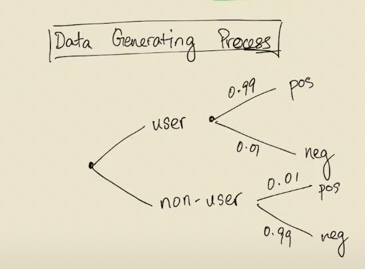

In [30]:
Image(filename="./imgs/drug_test_process.jpg",width=900, height=900)

From Bayes Theorem, 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+)}$$

We can expand the denominator here into 

$$P(+)  = P(+,user) + P(+,non-user) $$

so that

$$ P(+)=P(+|user)P(user) + P(+|non-user)P(non-user)$$

and 

$$P(user|+) = \frac{P(+|user)P(user)}{P(+|user)P(user) + P(+|non-user)P(non-user)}$$.
$$P(user|+) = \frac{0.99\times 0.005}{0.99\times 0.005 + 0.01\times 0.995} = 0.332 $$

This means that if an individual tests positive, there is still only a 33.2% chance that they are a user! This is because the number of non-users is so high compared to the number of users.

## Bayes' Theorem:
$$P(model|data) = \frac{P(data|model)P(model)}{P(data)}$$

- $P(model)$ : Prior distribution.
- $P(data|model)$: likelihood.
- $P(model|data)$: Posterrior distribution.

## Bayesian parameter estimation using PyMC3


1. To completely specify the model in terms of _probability distributions_. This includes specifying: 
    - what the form of the sampling distribution of the data is _and_ ,
    - what form describes our _uncertainty_ in the unknown parameters (This formulation is adapted from [Fonnesbeck's workshop](https://github.com/fonnesbeck/intro_stat_modeling_2017/blob/master/notebooks/2.%20Basic%20Bayesian%20Inference.ipynb) as Chris said it so well there).
2. Calculate the _posterior distribution_.

In the above, the form of the sampling distribution of the data was Binomial (described by the likelihood) and the uncertainty around the unknown parameter $p$ captured by the prior.

Now it is time to do the same using the **probabilistic programming language** PyMC3. There's _loads of cool stuff_ about PyMC3 and this paradigm, two of which are:
- _probabililty distributions_ are first class citizens, in that we can assign them to variables and use them intuitively to mirror how we think about priors, likelihoods & posteriors.
- PyMC3 calculates the posterior for us: this is fancy math done for lazy programmers!

Under the hood, PyMC3 will compute the posterior using a sampling based approach called Markov Chain Monte Carlo (MCMC) or Variational Inference. Check the [PyMC3 docs](https://docs.pymc.io/) for more on these. 


In part 2, we will go over a series of examples that will show you how to perform inference and prediction in a variety of problems. Hopefully, you will see that at the end of the day, everything we do boils down to estimation of some kind, and by doing it in a Bayesian setting, we avoid many pitfalls that come from blindly following canned statistical procedures.